In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

***EXERCISE 1***
- Read the data from the file smoking.csv, and divide the dataset into two groups con-
sisting of smokers and non-smokers. Write a script that computes the average lung
function, measured in FEV1, among smokers and non-smokers.
- Report your computed average FEV1 scores. Are you surprised?

In [2]:
smokingdataset = pd.read_csv('smoking.csv', header=None, names=['age', 'FEV1', 'height', 'gender', 'smoking status', 'weight'], sep='\t')
smokingdataset 

,age,FEV1,height,gender,smoking status,weight
0,9,1.708,57.0,0,0,9.540109
1,8,1.724,67.5,0,0,11.110110
2,7,1.720,54.5,0,0,9.513850
3,9,1.558,53.0,1,0,11.455923
4,9,1.895,57.0,1,0,10.297130
...,...,...,...,...,...,...
649,16,4.270,67.0,1,1,9.595947
650,15,3.727,68.0,1,1,8.530756
651,18,2.853,60.0,0,0,11.251590
652,16,2.795,63.0,0,1,9.037336


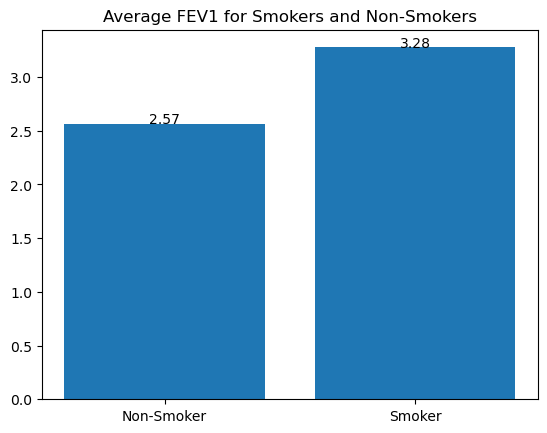

In [3]:
FEV1_non_smoker = 0
FEV1_smoker = 0
for i in range(0, 654):
    if smokingdataset['smoking status'][i] == 0:
        FEV1_non_smoker += smokingdataset['FEV1'][i]
    else:
        FEV1_smoker += smokingdataset['FEV1'][i]
non_smokerCount = sum(smokingdataset['smoking status'] == 0)
smokerCount = sum(smokingdataset['smoking status'] == 1)
plt.bar(['Non-Smoker', 'Smoker'], [FEV1_non_smoker/non_smokerCount, FEV1_smoker/smokerCount]);
plt.title('Average FEV1 for Smokers and Non-Smokers')
plt.text(0, FEV1_non_smoker/non_smokerCount, round(FEV1_non_smoker/non_smokerCount, 2), ha='center')
plt.text(1, FEV1_smoker/smokerCount, round(FEV1_smoker/smokerCount, 2), ha='center');

- As we can see in the plot above the lung capacity measured in the FEV1, which demonstrates that a non-smoker can exhale an average of $2.31 litres/secs$ which compared to a smoker which is $3.28 litres/secs.$
- The difference is quite surprising, because common sense would indicate the contrary, where a smoker would score less in FEV1 than a non-smoker.

***EXERCISE 2***
- Make box plots of the FEV1 for the two groups.
- What do you see? Are you surprised? What makes box plots a good choice for visualizing FEV1 for smokers and non-smokers?

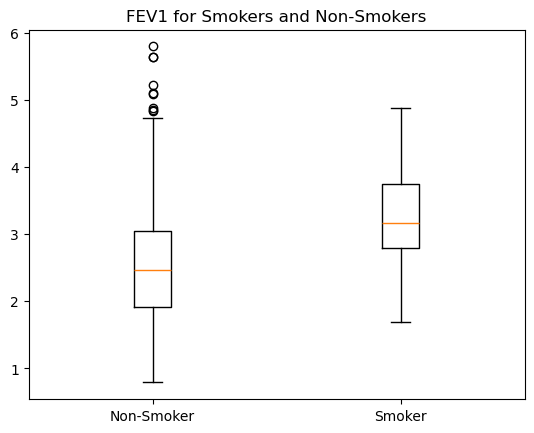

In [4]:
plt.boxplot([smokingdataset['FEV1'][smokingdataset['smoking status'] == 0], smokingdataset['FEV1'][smokingdataset['smoking status'] == 1]], labels=['Non-Smoker', 'Smoker']);
plt.title('FEV1 for Smokers and Non-Smokers');

- First of all we can see how the medians in the two boxplots are different. The non-smoker one seems to follow a more centrist tendency, while the smoker one indicates a possible negative skewedness to the left, that tells us that the majority of the data points is concentrated on the right.
- Secondly, the sizes of the boxes and the whiskers of the plots indicate a greater variability in the non-smoker data, which in the smoker data seems to present less variability, this might suggest that there are other factors (i.e.: conditions causing decreased FEV1?, age of the groups being too different?) in play causing the data to be more spread.
- Thirdly, the whiskers in the boxplots seems to corroborate what we have been mentioning so far, there is greater variability in the non-smoker data than in the smoker data.
- Finally the outliers that appear in the non-smoker data may indicate what we mentioned before, either possible conditions or the age gap being to wide. To address this question I created a scatter plot to see the distribution of ages in the two groups, since we know the dataset includes data from people aging 3 to 19.

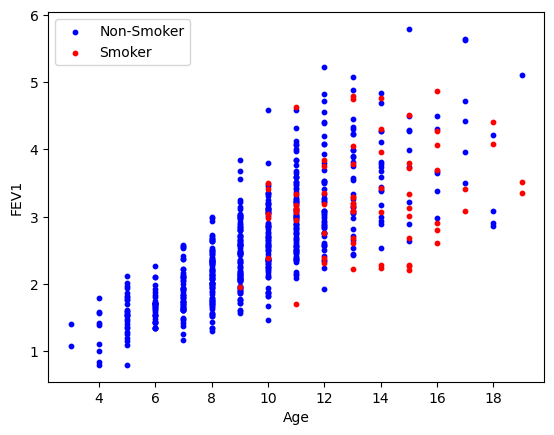

In [5]:
non_smokers = smokingdataset[smokingdataset['smoking status'] == 0]
smokers = smokingdataset[smokingdataset['smoking status'] == 1]

plt.scatter(non_smokers['age'], non_smokers['FEV1'], color='blue', s=10, label='Non-Smoker');
plt.scatter(smokers['age'], smokers['FEV1'], color='red', s=10, label='Smoker');
plt.xlabel('Age');
plt.ylabel('FEV1');
plt.legend();

- As we suggested before the data for the smokers seem to be skewed to the right. This is because the age is a better predictor of the subject being a smoker rather than the FEV1.
- To sum up I think a boxplot is a good tool to indentify certain characteristics of the data and find possible biases in a dataset, for example in this case the fact that teenagers are in the same pool as toddlers, can be misleading if not taken in account.

***EXERCISE 3***
- Write a script that performs a two-sided t-test whose null hypothesis is that the two
populations have the same mean. Use a significance level of α = 0.05, and return a
binary response indicating acceptance or rejection of the null hypothesis. You should
try to implement it by yourself – though not the CDF of the t-distribution, use scipy’s
stats.t.cdf. If you can’t, you may use scipy’s stats.ttest ind.
- Report your result and discuss it. Are you surprised?

In [6]:
def welch_t_test(a, b, alpha = 0.05):
    t_stat, p_value = stats.ttest_ind(a, b, equal_var=False)
    dof = welch_satterthwaite_dof(a, b)
    if p_value < alpha:
        print('Reject the null hypothesis')
        return t_stat, p_value, dof
    else:
        print('Fail to reject the null hypothesis')
        return t_stat, p_value, dof
def welch_satterthwaite_dof(a, b):
    s1 = np.var(a, ddof=1)
    s2 = np.var(b, ddof=1)
    n1 = sum(a)
    n2 = sum(b)
    dof = ((s1/n1 + s2/n2)**2) / ((s1**2 / (n1**2 * (n1 - 1))) + (s2**2 / (n2**2 * (n2 - 1))))
    return dof
    
welch_t_test(non_smokers['FEV1'], smokers['FEV1'])

Reject the null hypothesis


(-7.149608129503808, 3.073812744876234e-10, 294.4434842277525)

The results indicate various things:
- First we get the rejection of the null hypothesis which means that there is a significant difference between the groups as we saw before.
- Secondly we see how the t_statistic is negative indicating that the mean of the first sample(non-smokers) is lower than the second sample (smokers), which coincides with what we have seen so far.
- The p_value being so low is clearly indicating the rejection of the null hypothesis.
- Summing up we can say the following: the t-test resulting in the rejection of the null hypothesis indicates that there is a meaningful difference between the two groups being compared.

***EXERCISE 4***
- Compute the correlation between age and FEV1. Make a scatter plot of age versus
FEV1 where non-smokers appear in one color and smokers appear in another.
- What do you see? What makes a scatter plot a good choice for visualizing these variables?

In [7]:
Correlation = np.corrcoef(smokingdataset['age'], smokingdataset['FEV1'])[0, 1]
print('Pearson correlation coefficient: ', Correlation)

Pearson correlation coefficient:  0.7564589899895996


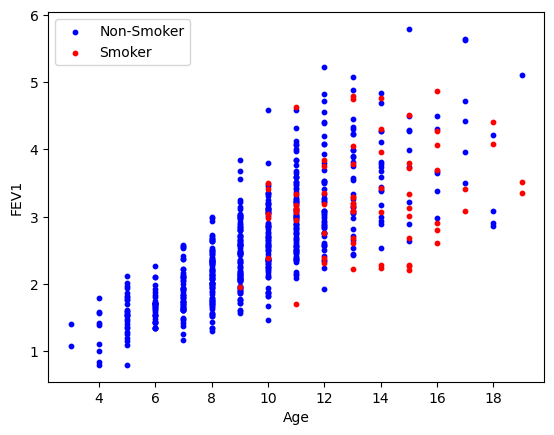

In [8]:
non_smokers = smokingdataset[smokingdataset['smoking status'] == 0]
smokers = smokingdataset[smokingdataset['smoking status'] == 1]

plt.scatter(non_smokers['age'], non_smokers['FEV1'], color='blue', s=10, label='Non-Smoker');
plt.scatter(smokers['age'], smokers['FEV1'], color='red', s=10, label='Smoker');
plt.xlabel('Age');
plt.ylabel('FEV1');
plt.legend();

- Firstly, our observations align with our prior theories; age exhibits a strong correlation with the FEV1 variable.

- Secondly, it appears my curiosity led me to jump the gun by creating the scatterplot prematurely. Nevertheless, as we previously discussed, a scatterplot provides a comprehensive visual perspective for this specific dataset, enabling the interpretation of crucial variables such as age.

***EXERCISE 5***
- Create a histogram over the age of subjects in each of the two groups, smokers and
non-smokers.
- What do you see? Does this explain your results on lung function (FEV1) in the two
groups? What makes histograms a good choice in this case?

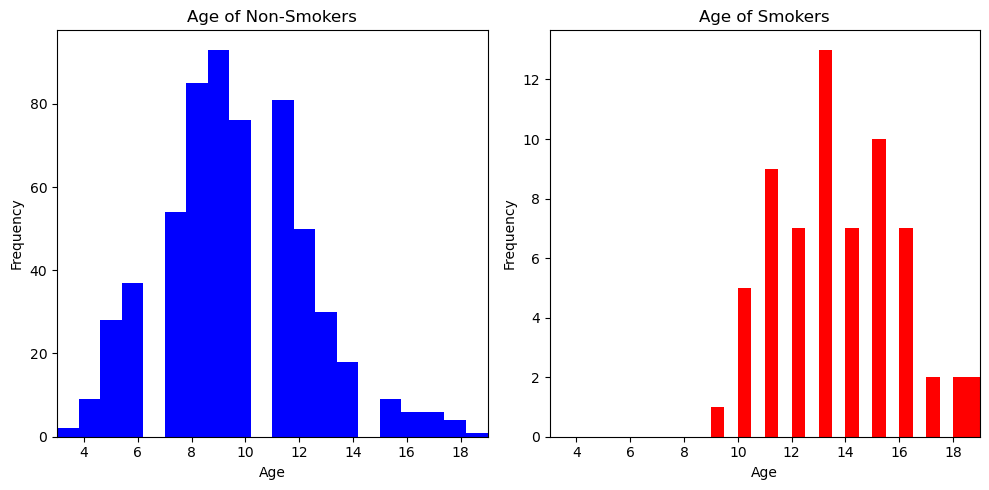

In [9]:
min_age = min(min(non_smokers['age']), min(smokers['age']))
max_age = max(max(non_smokers['age']), max(smokers['age']))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(non_smokers['age'], bins=20, label='Non-Smoker', color='blue');
ax1.set_title('Age of Non-Smokers');
ax1.set_xlabel('Age');
ax1.set_ylabel('Frequency');
ax1.set_xlim(min_age, max_age);

ax2.hist(smokers['age'], bins=20, label='Smoker', color='red');
ax2.set_title('Age of Smokers');
ax2.set_xlabel('Age');
ax2.set_ylabel('Frequency');
ax2.set_xlim(min_age, max_age);

plt.tight_layout();
plt.show();

In these histograms we can see how the distribution of the ages between the two groups is quite different. Which is what we have been theorising so far and established as main point of contention before.
- From these results we can draw why the mean lung function in the smokers is higher than in the non-smokers, that is because an older person has on average more lung capacity than a younger one specially on crucially developing stages of growing.
- It is a very good decision to use histograms in this case because it allows us to see the variable age across the two groups of subjects.

GitHub Copilot v1.162.0 was used as assistance while developing the code for this assignment.